####Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

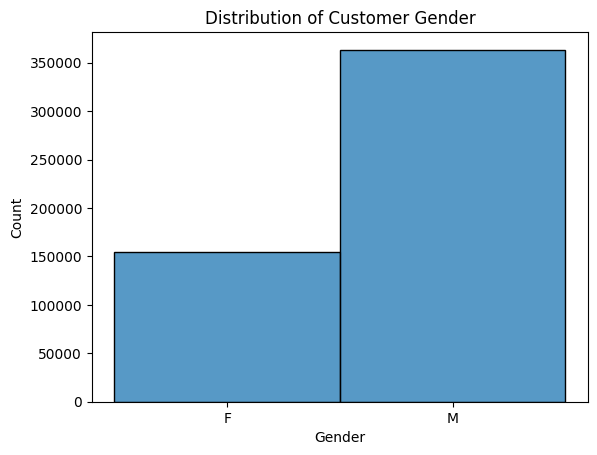

In [ ]:
sns.histplot(data=df8,x='CustGender',bins=2)
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

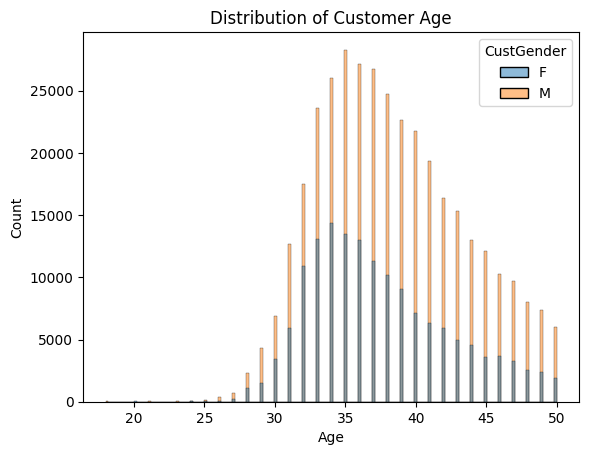

In [ ]:
sns.histplot(data=df8,x='Age',hue='CustGender')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

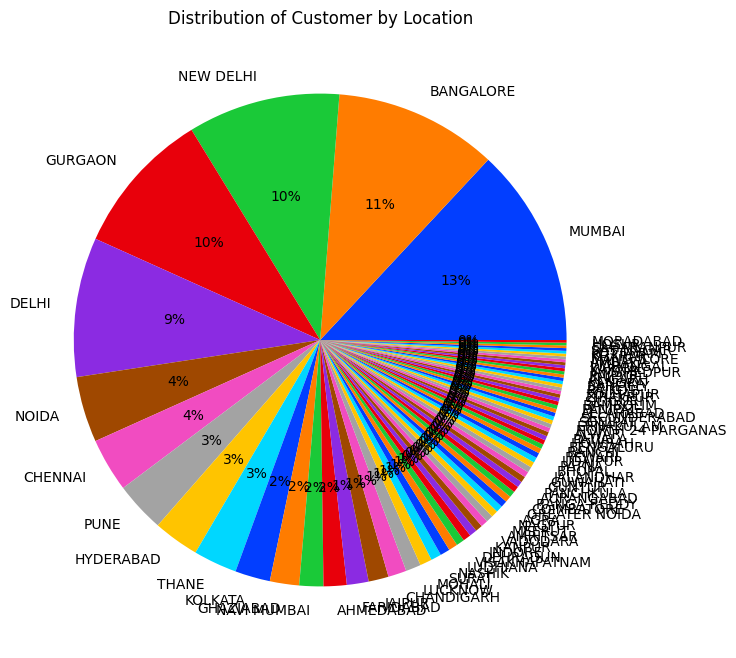

In [ ]:
plt.figure(figsize=(8,8))
sns.set_palette('bright')
plt.pie(x=locations['ValueCounts'], labels=locations['CustLocation'],autopct='%.0f%%')
plt.title('Distribution of Customer by Location')
plt.show()

In [ ]:
#Dropping unnecessary column TransactionTime
df8.drop('TransactionTime',axis=1,inplace=True)

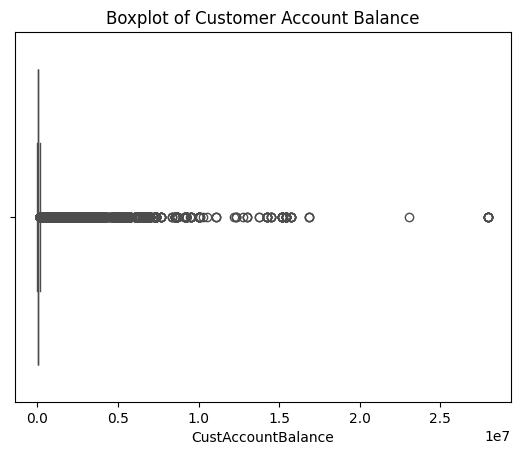

In [ ]:
#Check for outliers in customer's Account Balance
sns.boxplot(df8,x='CustAccountBalance')
plt.title('Boxplot of Customer Account Balance')
plt.show()

In [ ]:
'''
Winsorizing is a statistical technique used to reduce the impact of outliers on data analysis
by replacing extreme values with less extreme ones, specifically percentiles of the data
'''

from scipy.stats.mstats import winsorize

df9 = df8.copy()
df9 = df9[df9['CustAccountBalance'].isin(winsorize(df9['CustAccountBalance'],limits=(0,0.25)))]
print(df8.shape)
print(df9.shape)

(517451, 7)
(388089, 7)


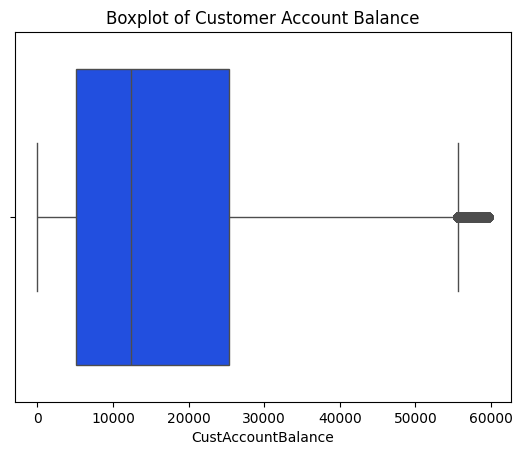

In [ ]:
#Check the distribution after winsorization
sns.boxplot(df9,x='CustAccountBalance')
plt.title('Boxplot of Customer Account Balance')
plt.show()

We had to cut out all the millionaires, as 75% of population is below $60,535

In [ ]:
df9['CustAccountBalance'].describe()

,CustAccountBalance
count,388089.000000
mean,17052.746696
std,14940.527898
min,0.020000
25%,5146.740000
50%,12333.650000
75%,25315.100000
max,59636.540000


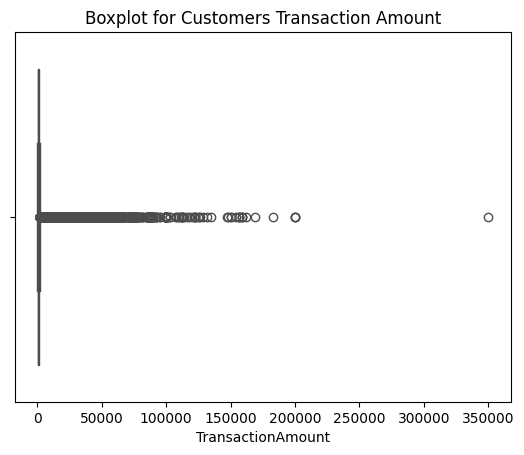

In [ ]:
#Check for outliers in Transaction Amount
sns.boxplot(df8,x='TransactionAmount')
plt.title('Boxplot for Customers Transaction Amount')
plt.show()

In [ ]:
#Performing winsorization
df10 = df9.copy()
df10 = df10[df10['TransactionAmount'].isin(winsorize(df10['TransactionAmount'],limits=(0.25, 0.25)))]
print(df9.shape)
print(df10.shape)

(388089, 7)
(195928, 7)


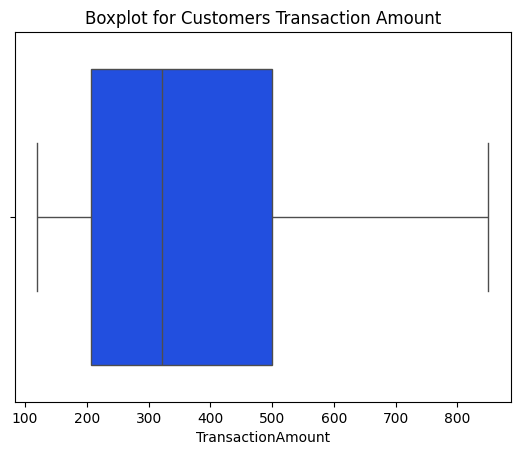

In [ ]:
#Check the distribution after Winsorization
sns.boxplot(df10,x='TransactionAmount')
plt.title('Boxplot for Customers Transaction Amount')
plt.show()

We need to cut out all other outliers transactions, since 75% of population in below 75%

In [ ]:
df10['TransactionAmount'].describe()

,TransactionAmount
count,195928.000000
mean,377.857455
std,191.484065
min,120.000000
25%,206.000000
50%,320.975000
75%,500.000000
max,850.000000


In [ ]:
#New feature named Transaction Month
df10['TransactionMonth'] = df10['TransactionDate'].dt.month
df10.sample(1)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount,Age,BalTransRatio,TransactionMonth
824669,M,GURGAON,26697.57,2016-04-09,473.0,50,0.017717,4


In [ ]:
#We no longer require the Transaction Date
df10.drop('TransactionDate',axis=1,inplace=True)

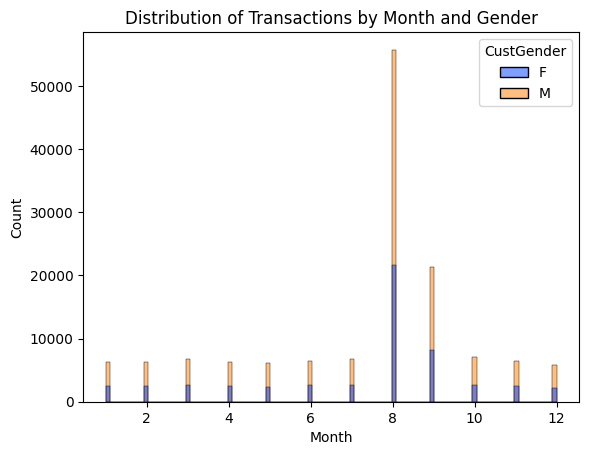

In [ ]:
#Plot the distribution of transactions by month and gender
sns.histplot(df10,x='TransactionMonth',hue='CustGender')
plt.title('Distribution of Transactions by Month and Gender')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

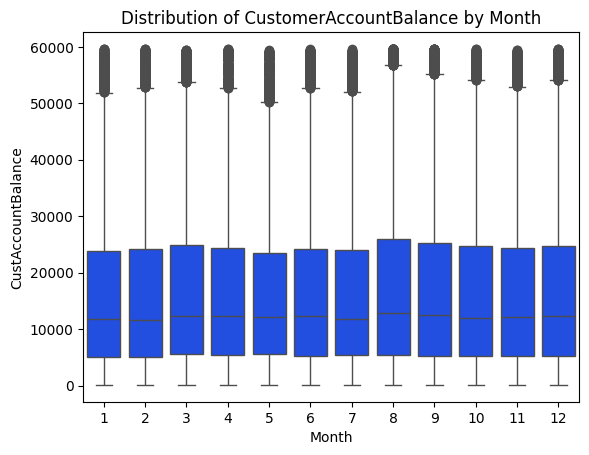

In [ ]:
#Plot the distribution of Customers account balance by month
sns.boxplot(df10,x='TransactionMonth',y='CustAccountBalance')
plt.title('Distribution of CustomerAccountBalance by Month')
plt.xlabel('Month')
plt.ylabel('CustAccountBalance')
plt.show()

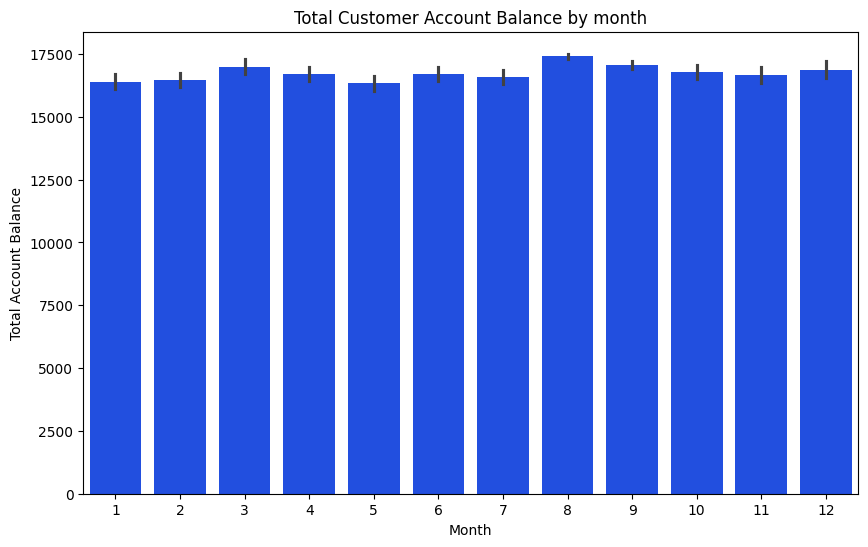

In [ ]:
#Show which month has the highest customer account balance
plt.figure(figsize=(10,6))
sns.barplot(data=df10,x='TransactionMonth',y='CustAccountBalance')
plt.title('Total Customer Account Balance by month')
plt.xlabel('Month')
plt.ylabel('Total Account Balance')
plt.show()

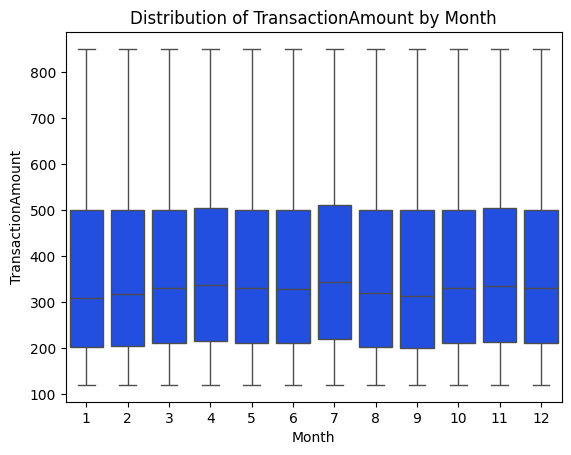

In [ ]:
#Plot the distribution of TransactionAmount balance by month
sns.boxplot(df10,x='TransactionMonth',y='TransactionAmount')
plt.title('Distribution of TransactionAmount by Month')
plt.xlabel('Month')
plt.ylabel('TransactionAmount')
plt.show()

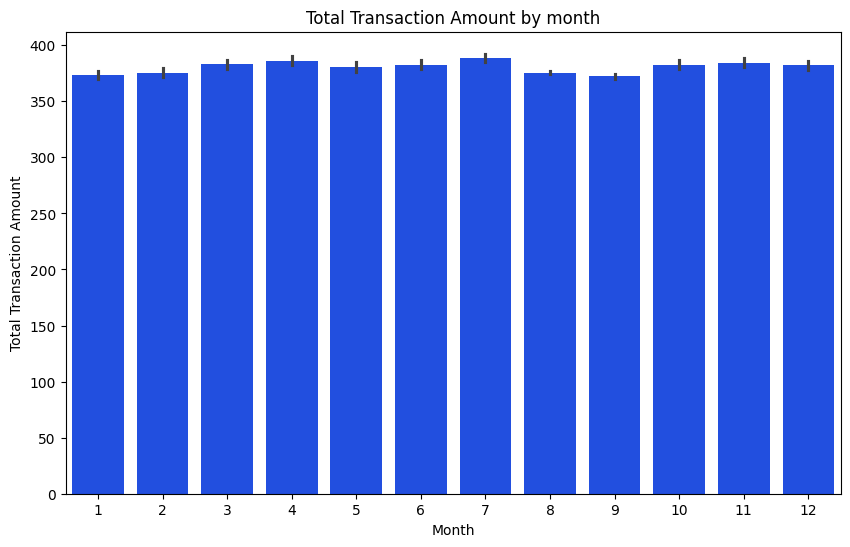

In [ ]:
#Show which month has the highest transaction amount
plt.figure(figsize=(10,6))
sns.barplot(data=df10,x='TransactionMonth',y='TransactionAmount')
plt.title('Total Transaction Amount by month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.show()

In [ ]:
#Correlation matrix of the numerical features
numerical = df10[['CustAccountBalance','TransactionAmount','Age','BalTransRatio','TransactionMonth']]
corr_matrix = numerical.corr()
corr_matrix

,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth
CustAccountBalance,1.000000,0.085654,0.120045,-0.450800,0.011387
TransactionAmount,0.085654,1.000000,0.082876,0.117138,-0.001329
Age,0.120045,0.082876,1.000000,-0.038128,-0.001874
BalTransRatio,-0.450800,0.117138,-0.038128,1.000000,-0.001430
TransactionMonth,0.011387,-0.001329,-0.001874,-0.001430,1.000000


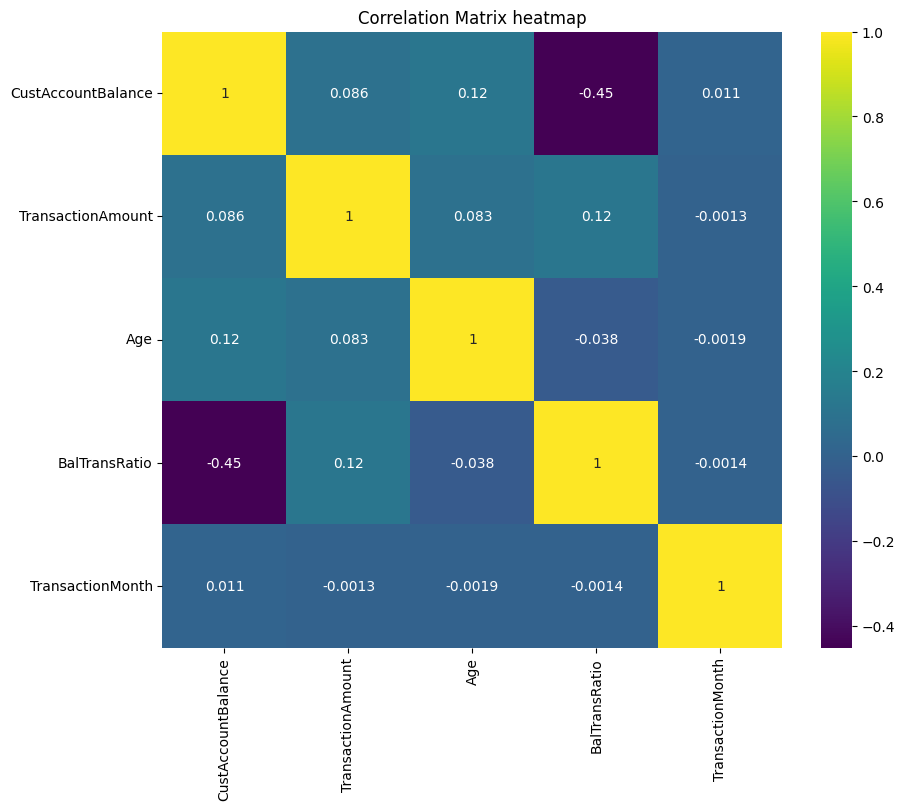

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2g',cmap='viridis')
plt.title('Correlation Matrix heatmap')
plt.show()

####Label Encoding

Converting categorical variables into numerical ones for further ML activities

includes:
* Label Encoding for Genders
* Dummy variables for Locations

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Encoding customer genders
encoder = LabelEncoder()
df10['CustGender'] = encoder.fit_transform(df10['CustGender'])
df10.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth
823108,1,BANGALORE,6224.56,200.0,35,0.032131,4
171517,0,DELHI,9742.00,601.0,35,0.061692,4
215744,0,DELHI,19809.36,423.0,49,0.021354,8


In [ ]:
#Get dummy variables for customer's location
dummies = pd.get_dummies(df10['CustLocation'])
dummies.sample(3)

,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,ALWAR,AMBALA,AMRITSAR,AURANGABAD,BAMBOLIM,BANGALORE,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
920629,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
849040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#convert dummies into integer
dummies =  dummies.astype(int)
dummies.sample(3)

,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,ALWAR,AMBALA,AMRITSAR,AURANGABAD,BAMBOLIM,BANGALORE,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
874279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Merge the two datasets
df11 = df10.copy()
df11 = df11.merge(dummies,left_index=True,right_index=True)
df11.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
311427,0,COIMBATORE,4053.37,359.0,32,0.088568,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516417,0,GREATER NOIDA,53509.26,469.0,37,0.008765,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932857,1,NAVI MUMBAI,5201.85,205.0,32,0.039409,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Drop the column CustLocation, since its not required
df11.drop('CustLocation',axis=1,inplace=True)
df11.sample(3)

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
317500,1,8388.38,200.00,43,0.023843,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742932,1,2564.12,700.46,35,0.273178,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750658,1,18812.18,259.00,43,0.013768,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11.describe()

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
count,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,...,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000,195928.000000
mean,0.721209,17015.404921,377.857455,37.636703,0.076120,7.279399,0.004104,0.015592,0.001970,0.002271,...,0.002450,0.002424,0.002603,0.006273,0.030960,0.003302,0.004624,0.005272,0.002123,0.001950
std,0.448406,14684.581804,191.484065,4.964636,0.138577,2.689601,0.063928,0.123893,0.044342,0.047604,...,0.049436,0.049178,0.050953,0.078952,0.173211,0.057370,0.067844,0.072419,0.046030,0.044112
min,0.000000,122.970000,120.000000,18.000000,0.002022,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5337.590000,206.000000,34.000000,0.013283,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12429.420000,320.975000,37.000000,0.027390,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,25095.320000,500.000000,41.000000,0.067130,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,59636.540000,850.000000,50.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


:Now, the data is well scaled , from 0 to 1 in all columns.

It can be said that the data is ready for PCA